In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump, load

In [2]:
# Load data
data = pd.read_csv('new_train_data_128.csv').sample(frac=1)

# Train test split
X = data.iloc[:, 0:43]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature Scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

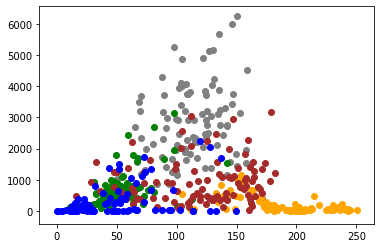

In [3]:
# Data Visualization
feature1 = 'red mean'
feature2 = 'red var'

# City
city = data.loc[data['class'] == 'city'].sample(100)
plt.scatter(city[feature1], city[feature2], c='gray')

# Desert
desert = data.loc[data['class'] == 'desert'].sample(100)
plt.scatter(desert[feature1], desert[feature2], c='orange')

# Forest
forest = data.loc[data['class'] == 'forest'].sample(100)
plt.scatter(forest[feature1], forest[feature2], c='green')

# Mountain
mountain = data.loc[data['class'] == 'mountain'].sample(100)
plt.scatter(mountain[feature1], mountain[feature2], c='brown')

# Ocean
ocean = data.loc[data['class'] == 'ocean'].sample(100)
plt.scatter(ocean[feature1], ocean[feature2], c='blue')

plt.show()

In [4]:
# Train
clf = SVC(C=10, kernel='rbf', degree=3, gamma='scale', decision_function_shape='ovo').fit(X_train, y_train) 
scores = cross_val_score(clf, X_train, y_train, cv=10)
#dump(clf, 'models/svm.joblib') 
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.981 (+/- 0.001)


In [5]:
# Test
y_pred = clf.predict(X_test)

In [6]:
# Results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4745   10   35   37   13]
 [  12 3651    0   14    2]
 [  90    2 3901   35    5]
 [  45   27   23 3792    5]
 [  15    0    5    2 4695]]
              precision    recall  f1-score   support

        city       0.97      0.98      0.97      4840
      desert       0.99      0.99      0.99      3679
      forest       0.98      0.97      0.98      4033
    mountain       0.98      0.97      0.98      3892
       ocean       0.99      1.00      1.00      4717

    accuracy                           0.98     21161
   macro avg       0.98      0.98      0.98     21161
weighted avg       0.98      0.98      0.98     21161



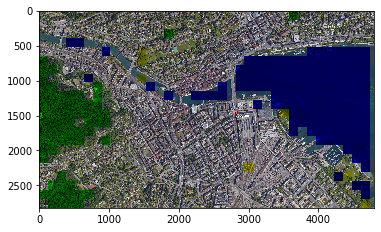

In [7]:
# libraries
import numpy as np
import ctfeatures as ctf
from PIL import Image
from joblib import dump, load

# Load test image
path = '/Users/davidshatwell/dev/mt0017/ml-project/dataset/test/lucerne.jpg'
image = np.array(Image.open(path))
data = ctf.get_image_data(image, '', (128, 128))
X = data.iloc[:, 0:43]
X = scaler.transform(X)

clf = load('models/svm.joblib') 
y_pred = clf.predict(X)

# 
image_height = image.shape[0]
image_width = image.shape[1]

subimage_height = 128 
subimage_width = 128

index = 0
for i in range(int(image_height / subimage_height)):
        for j in range(int(image_width / subimage_width)):
            x_start = i * subimage_height
            x_end = (i + 1) * subimage_height
            y_start = j * subimage_width
            y_end = (j + 1) * subimage_width
            
            if y_pred[index] == 'city':
                pass
            elif y_pred[index] == 'desert':
                image[x_start:x_end, y_start:y_end, 1] = 0
                image[x_start:x_end, y_start:y_end, 2] = 0
            elif y_pred[index] == 'forest':
                image[x_start:x_end, y_start:y_end, 0] = 0
                image[x_start:x_end, y_start:y_end, 2] = 0
            elif y_pred[index] == 'mountain':
                image[x_start:x_end, y_start:y_end, 2] = 0
            else:
                image[x_start:x_end, y_start:y_end, 0] = 0
                image[x_start:x_end, y_start:y_end, 1] = 0
            
            index += 1
            
img = plt.imshow(image)
plt.savefig('svm_lucerne.jpg', dpi=400)